In [23]:
import numpy as np

In [24]:
import pandas as pd

In [25]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

In [27]:
def DetectOutlier(df,var):
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR
 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 df1 = df[((df[var] < low) | (df[var] > high))]
 print('Outliers : \n', len(df1))
 print(df1.T)
 df = df[((df[var] >= low) & (df[var] <= high))]
 return(df)

In [28]:
df = pd.read_csv('academic.csv')

In [29]:
print('Information of Dataset:\n', df.info)

Information of Dataset:
 <bound method DataFrame.info of     gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F

In [30]:
print('Statistical information of Numerical Columns: \n',df.describe())

Statistical information of Numerical Columns: 
        raisedhands  VisITedResources  AnnouncementsView  Discussion
count   478.000000        480.000000         480.000000  480.000000
mean     46.939331         54.797917          37.918750   43.283333
std      31.375699         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.000000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     170.000000         99.000000          98.000000   99.000000


# Filling Missing Values

In [31]:
df.isna().sum()

gender                      2
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 2
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [32]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

In [33]:
df['raisedhands'].fillna(df['raisedhands'].mean(), inplace=True)

In [34]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Remove Outlier

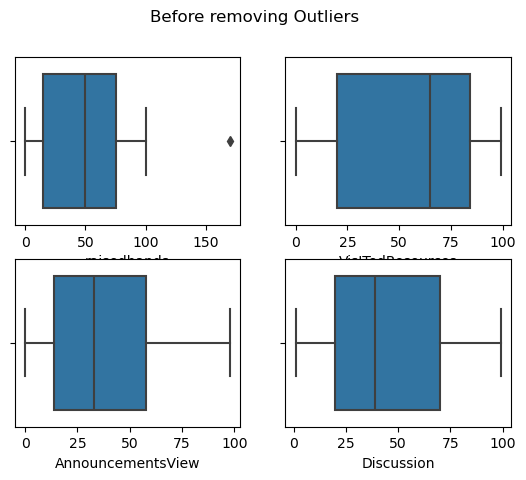

In [35]:
fig, axes = plt.subplots(2,2)
fig.suptitle('Before removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

In [36]:
df = DetectOutlier(df,'raisedhands')

Highest allowed in variable: raisedhands 165.0
lowest allowed in variable: raisedhands -75.0
Total outliers in: raisedhands : 1
Outliers : 
 1
                                    28
gender                               M
NationalITy                         KW
PlaceofBirth                    KuwaIT
StageID                   MiddleSchool
GradeID                           G-08
SectionID                            A
Topic                          Science
Semester                             F
Relation                        Father
raisedhands                      170.0
VisITedResources                    85
AnnouncementsView                   52
Discussion                          43
ParentAnsweringSurvey              Yes
ParentschoolSatisfaction          Good
StudentAbsenceDays             Under-7
Class                                M


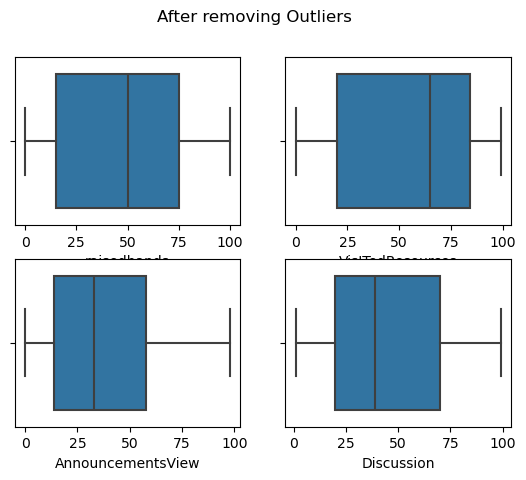

In [37]:
fig, axes = plt.subplots(2,2)
fig.suptitle('After removing Outliers')
sns.boxplot(data = df, x ='raisedhands', ax=axes[0,0])
sns.boxplot(data = df, x ='VisITedResources', ax=axes[0,1])
sns.boxplot(data = df, x ='AnnouncementsView', ax=axes[1,0])
sns.boxplot(data = df, x ='Discussion', ax=axes[1,1])
plt.show()

# Variable Transform

In [38]:
from sklearn.preprocessing import PowerTransformer

In [39]:
Pwr = PowerTransformer(standardize=True)  
df['AnnouncementsView'] = Pwr.fit_transform(df['AnnouncementsView'].values.reshape(-1,1))
df['Discussion'] = Pwr.fit_transform(df['Discussion'].values.reshape(-1,1))

C:\Users\Atharv Mahajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Atharv Mahajan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


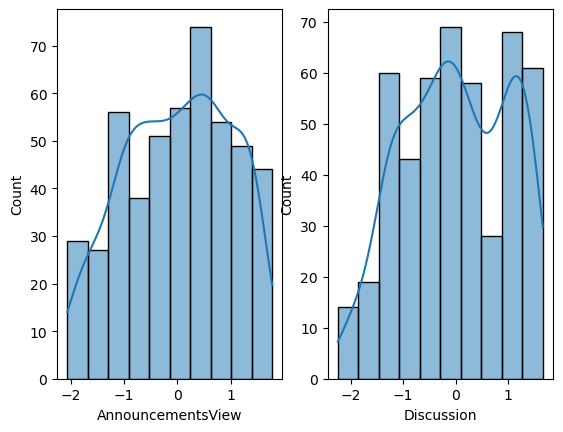

In [40]:
fig, axes = plt.subplots(1,2)
sns.histplot(ax = axes[0], data = df['AnnouncementsView'], kde=True)
sns.histplot(ax = axes[1], data = df['Discussion'], kde=True)
plt.show()